In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install shap


In [10]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from tabulate import tabulate


import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate
from sklearn.neural_network import MLPRegressor
import shap


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
attributes = pd.read_csv("/content/drive/MyDrive/airline_data/prediction_fulldataset.csv",low_memory=False)


In [13]:
month_label = list(attributes['departure_month'].unique())
month_label

['October', 'August', 'September', 'December', 'November']

In [14]:
attributes['dep'] = pd.to_datetime(attributes['dep'])

# Get the day of the week
attributes['day_of_week'] = attributes['dep'].dt.day_name()


In [15]:
df_final= attributes
df_final.columns

Index(['SourceAirport', 'DestinationAirport', 'dep', 'capacity',
       'days_left_result', 'cre', 'mean_confirmed_fare',
       'cumulative number of seats booked', 'cumulative number of bookings',
       'number_of_bookings_on_given_day', 'number_of_seatsbooked_on_given_day',
       'load factor', 'baseline', 'Departure_Time', 'departure_day',
       'departure_month', 'DepartureDate', 'day_type_weekend',
       'departure_hour', 'percentage_diff', 'Conversion Rate',
       'departure_time', 'time_category', 'day_of_week'],
      dtype='object')

In [16]:
# Select only numeric columns
numeric_columns = df_final.select_dtypes(include=[np.number])

# Check for inf and -inf values in numeric columns
inf_check = numeric_columns.apply(lambda x: np.isinf(x).any())
inf_check

capacity                              False
days_left_result                      False
mean_confirmed_fare                   False
cumulative number of seats booked     False
cumulative number of bookings         False
number_of_bookings_on_given_day       False
number_of_seatsbooked_on_given_day    False
load factor                           False
baseline                              False
departure_day                         False
day_type_weekend                      False
departure_hour                        False
percentage_diff                        True
Conversion Rate                       False
dtype: bool

In [17]:
# Count the number of infinite values in the 'percentage_diff' column
inf_count_percentage_diff = np.isinf(df_final['percentage_diff']).sum()
inf_count_percentage_diff


8

In [18]:
# Create a mask that is True for rows where 'percentage_diff' is not infinite
mask = ~np.isinf(df_final['percentage_diff'])

# Apply the mask to filter out rows with infinite values in 'percentage_diff'
df_final_cleaned = df_final[mask]
df_final_cleaned

,SourceAirport,DestinationAirport,dep,capacity,days_left_result,cre,mean_confirmed_fare,cumulative number of seats booked,cumulative number of bookings,number_of_bookings_on_given_day,...,departure_day,departure_month,DepartureDate,day_type_weekend,departure_hour,percentage_diff,Conversion Rate,departure_time,time_category,day_of_week
0,SKG,ATH,2023-10-07 07:00:00,186.0,86,2023-07-13,55.0,2.0,2.0,1.0,...,7,October,2023-10-07,1,7,1.528000,0.055794,07:00:00,Morning,Saturday
1,HER,ATH,2023-08-10 07:00:00,186.0,84,2023-05-17,56.5,11.0,4.0,2.0,...,10,August,2023-08-10,0,7,0.391327,0.199650,07:00:00,Morning,Thursday
2,HER,ATH,2023-10-16 07:00:00,186.0,67,2023-08-09,15.0,4.0,2.0,1.0,...,16,October,2023-10-16,0,7,19.172000,0.210000,07:00:00,Morning,Monday
3,HER,ATH,2023-10-16 07:00:00,186.0,68,2023-08-08,15.0,2.0,1.0,1.0,...,16,October,2023-10-16,0,7,2.926000,0.210000,07:00:00,Morning,Monday
4,HER,ATH,2023-08-10 07:00:00,186.0,72,2023-05-30,49.5,21.0,9.0,2.0,...,10,August,2023-08-10,0,7,0.529293,0.199650,07:00:00,Morning,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,ATH,HER,2023-09-22 23:30:00,186.0,76,2023-07-08,24.0,2.0,1.0,1.0,...,22,September,2023-09-22,0,23,2.252083,0.170659,23:30:00,Late Night,Friday
34106,ATH,HER,2023-09-22 23:30:00,186.0,39,2023-08-14,28.0,14.0,8.0,1.0,...,22,September,2023-09-22,0,23,2.319643,0.170659,23:30:00,Late Night,Friday
34107,ATH,HER,2023-09-22 23:30:00,186.0,44,2023-08-09,28.0,13.0,7.0,1.0,...,22,September,2023-09-22,0,23,2.292857,0.170659,23:30:00,Late Night,Friday
34108,ATH,HER,2023-09-22 23:30:00,186.0,54,2023-07-30,24.0,10.0,6.0,1.0,...,22,September,2023-09-22,0,23,2.551667,0.170659,23:30:00,Late Night,Friday


In [19]:
na_counts = df_final_cleaned.isna().sum()
na_counts

SourceAirport                           0
DestinationAirport                      0
dep                                     0
capacity                                0
days_left_result                        0
cre                                     0
mean_confirmed_fare                     0
cumulative number of seats booked       0
cumulative number of bookings           0
number_of_bookings_on_given_day         0
number_of_seatsbooked_on_given_day      0
load factor                             0
baseline                                0
Departure_Time                          0
departure_day                           0
departure_month                         0
DepartureDate                           0
day_type_weekend                        0
departure_hour                          0
percentage_diff                         0
Conversion Rate                       124
departure_time                          0
time_category                           0
day_of_week                       

In [20]:
df_final_cleaned = df_final_cleaned.dropna(subset=['Conversion Rate'])
df_final_cleaned

,SourceAirport,DestinationAirport,dep,capacity,days_left_result,cre,mean_confirmed_fare,cumulative number of seats booked,cumulative number of bookings,number_of_bookings_on_given_day,...,departure_day,departure_month,DepartureDate,day_type_weekend,departure_hour,percentage_diff,Conversion Rate,departure_time,time_category,day_of_week
0,SKG,ATH,2023-10-07 07:00:00,186.0,86,2023-07-13,55.0,2.0,2.0,1.0,...,7,October,2023-10-07,1,7,1.528000,0.055794,07:00:00,Morning,Saturday
1,HER,ATH,2023-08-10 07:00:00,186.0,84,2023-05-17,56.5,11.0,4.0,2.0,...,10,August,2023-08-10,0,7,0.391327,0.199650,07:00:00,Morning,Thursday
2,HER,ATH,2023-10-16 07:00:00,186.0,67,2023-08-09,15.0,4.0,2.0,1.0,...,16,October,2023-10-16,0,7,19.172000,0.210000,07:00:00,Morning,Monday
3,HER,ATH,2023-10-16 07:00:00,186.0,68,2023-08-08,15.0,2.0,1.0,1.0,...,16,October,2023-10-16,0,7,2.926000,0.210000,07:00:00,Morning,Monday
4,HER,ATH,2023-08-10 07:00:00,186.0,72,2023-05-30,49.5,21.0,9.0,2.0,...,10,August,2023-08-10,0,7,0.529293,0.199650,07:00:00,Morning,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,ATH,HER,2023-09-22 23:30:00,186.0,76,2023-07-08,24.0,2.0,1.0,1.0,...,22,September,2023-09-22,0,23,2.252083,0.170659,23:30:00,Late Night,Friday
34106,ATH,HER,2023-09-22 23:30:00,186.0,39,2023-08-14,28.0,14.0,8.0,1.0,...,22,September,2023-09-22,0,23,2.319643,0.170659,23:30:00,Late Night,Friday
34107,ATH,HER,2023-09-22 23:30:00,186.0,44,2023-08-09,28.0,13.0,7.0,1.0,...,22,September,2023-09-22,0,23,2.292857,0.170659,23:30:00,Late Night,Friday
34108,ATH,HER,2023-09-22 23:30:00,186.0,54,2023-07-30,24.0,10.0,6.0,1.0,...,22,September,2023-09-22,0,23,2.551667,0.170659,23:30:00,Late Night,Friday


In [21]:
na_counts = df_final_cleaned.isna().sum()
na_counts

SourceAirport                         0
DestinationAirport                    0
dep                                   0
capacity                              0
days_left_result                      0
cre                                   0
mean_confirmed_fare                   0
cumulative number of seats booked     0
cumulative number of bookings         0
number_of_bookings_on_given_day       0
number_of_seatsbooked_on_given_day    0
load factor                           0
baseline                              0
Departure_Time                        0
departure_day                         0
departure_month                       0
DepartureDate                         0
day_type_weekend                      0
departure_hour                        0
percentage_diff                       0
Conversion Rate                       0
departure_time                        0
time_category                         0
day_of_week                           0
dtype: int64

In [22]:
X_features = df_final_cleaned[
    ['SourceAirport', 'DestinationAirport', 'capacity',
       'days_left_result', 'mean_confirmed_fare','cumulative number of bookings',
       'load factor', 'departure_day',
       'departure_month', 'day_type_weekend',
       'departure_hour', 'percentage_diff', 'Conversion Rate',
      'time_category','day_of_week']
]
y_target = df_final_cleaned['number_of_bookings_on_given_day']

# Define numerical and categorical columns
numerical_cols = ['capacity', 'days_left_result', 'mean_confirmed_fare', 'departure_day','departure_hour','load factor','cumulative number of bookings','day_type_weekend','percentage_diff','Conversion Rate']
categorical_cols = ['SourceAirport', 'DestinationAirport', 'departure_month','time_category','day_of_week']

# Preprocessing: Create transformers for numerical and categorical columns
numerical_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))  # Use drop='first' to prevent multicollinearity
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the final pipeline for each model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': xgb.XGBRegressor()  # Add XGBoost model
}

results = []

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

original_rows_X_test = df_final_cleaned.loc[X_test.index]

for model_name, model in models.items():
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([model_name, mse, r2])

mse = mean_squared_error(original_rows_X_test['number_of_bookings_on_given_day'], original_rows_X_test['baseline'])
r2 = r2_score(original_rows_X_test['number_of_bookings_on_given_day'], original_rows_X_test['baseline'])
results.append(['Baseline', mse, r2])



# Create a table to display the results
table = tabulate(results, headers=['Model', 'MSE', 'R2 Score'], tablefmt='pretty')


# Print the table
print(table)

+-------------------+--------------------+-------------------------+
|       Model       |        MSE         |        R2 Score         |
+-------------------+--------------------+-------------------------+
| Linear Regression | 1.8768519151438918 |   0.36103194318551046   |
|   Random Forest   | 0.8687246909947027 |   0.7042455383758413    |
| Lasso Regression  | 2.937324596522385  | -2.4906223998755195e-06 |
|   Decision Tree   | 1.4924955856386108 |    0.491884790448908    |
|      XGBoost      | 0.9180978434309781 |   0.6874366111416466    |
|     Baseline      | 2.1709829311359625 |   0.2608960069292309    |
+-------------------+--------------------+-------------------------+


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

# Ensure GPU is available
if not torch.cuda.is_available():
    raise ValueError("No GPU detected. Make sure you have CUDA installed.")

# Convert data to PyTorch tensors and move to GPU
X_train_transformed = torch.tensor(preprocessor.fit_transform(X_train).astype('float32')).cuda()
y_train_tensor = torch.tensor(y_train.values.astype('float32')).cuda()
X_test_transformed = torch.tensor(preprocessor.transform(X_test).astype('float32')).cuda()
y_test_tensor = torch.tensor(y_test.values.astype('float32')).cuda()

class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()

        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 1)

        # Add dropout layers
        self.dropout = nn.Dropout(0.3) # 30% dropout

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)

        x = torch.relu(self.layer2(x))
        x = self.dropout(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout(x)

        x = torch.relu(self.layer4(x))
        return self.layer5(x)


model_mlp = NeuralNet(X_train_transformed.shape[1]).cuda()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.005, weight_decay=0.005) # 0.01 is the L2 regularization strength

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model_mlp(X_train_transformed)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Compute R^2 Score
def r2_score(y_true, y_pred):
    mean_y_true = y_true.mean()
    total_variance = ((y_true - mean_y_true) ** 2).sum()
    explained_variance = ((y_true - y_pred) ** 2).sum()
    r2 = 1 - (explained_variance / total_variance)
    return r2.item()

# Evaluate the model
model_mlp.eval()
with torch.no_grad():
    test_outputs = model_mlp(X_test_transformed)
    test_loss = criterion(test_outputs.squeeze(), y_test_tensor)
    test_r2 = r2_score(y_test_tensor, test_outputs.squeeze())
print(f'Test MSE Loss: {test_loss.item():.4f}')
print(f'Test R2 Score: {test_r2:.4f}')

Epoch [1/2000], Loss: 6.5964
Epoch [2/2000], Loss: 6.0191
Epoch [3/2000], Loss: 5.0164
Epoch [4/2000], Loss: 3.6007
Epoch [5/2000], Loss: 3.2070
Epoch [6/2000], Loss: 3.5170
Epoch [7/2000], Loss: 2.7077
Epoch [8/2000], Loss: 2.4486
Epoch [9/2000], Loss: 2.5501
Epoch [10/2000], Loss: 2.5355
Epoch [11/2000], Loss: 2.4485
Epoch [12/2000], Loss: 2.2878
Epoch [13/2000], Loss: 2.2672
Epoch [14/2000], Loss: 2.3679
Epoch [15/2000], Loss: 2.3426
Epoch [16/2000], Loss: 2.2406
Epoch [17/2000], Loss: 2.1700
Epoch [18/2000], Loss: 2.1996
Epoch [19/2000], Loss: 2.2095
Epoch [20/2000], Loss: 2.1304
Epoch [21/2000], Loss: 2.0822
Epoch [22/2000], Loss: 2.0357
Epoch [23/2000], Loss: 2.0682
Epoch [24/2000], Loss: 2.0450
Epoch [25/2000], Loss: 2.0063
Epoch [26/2000], Loss: 2.0045
Epoch [27/2000], Loss: 1.9987
Epoch [28/2000], Loss: 2.0050
Epoch [29/2000], Loss: 1.9452
Epoch [30/2000], Loss: 1.9342
Epoch [31/2000], Loss: 1.9227
Epoch [32/2000], Loss: 1.9151
Epoch [33/2000], Loss: 1.8924
Epoch [34/2000], Lo

In [24]:
results.append(['Feedforward Neural Network(MLP)', test_loss.item(), test_r2])

In [25]:
# Create a table to display the results
table = tabulate(results, headers=['Model', 'MSE', 'R2 Score'], tablefmt='pretty')


# Print the table
print(table)

+---------------------------------+--------------------+-------------------------+
|              Model              |        MSE         |        R2 Score         |
+---------------------------------+--------------------+-------------------------+
|        Linear Regression        | 1.8768519151438918 |   0.36103194318551046   |
|          Random Forest          | 0.8687246909947027 |   0.7042455383758413    |
|        Lasso Regression         | 2.937324596522385  | -2.4906223998755195e-06 |
|          Decision Tree          | 1.4924955856386108 |    0.491884790448908    |
|             XGBoost             | 0.9180978434309781 |   0.6874366111416466    |
|            Baseline             | 2.1709829311359625 |   0.2608960069292309    |
| Feedforward Neural Network(MLP) | 1.0630146265029907 |   0.6381001472473145    |
+---------------------------------+--------------------+-------------------------+


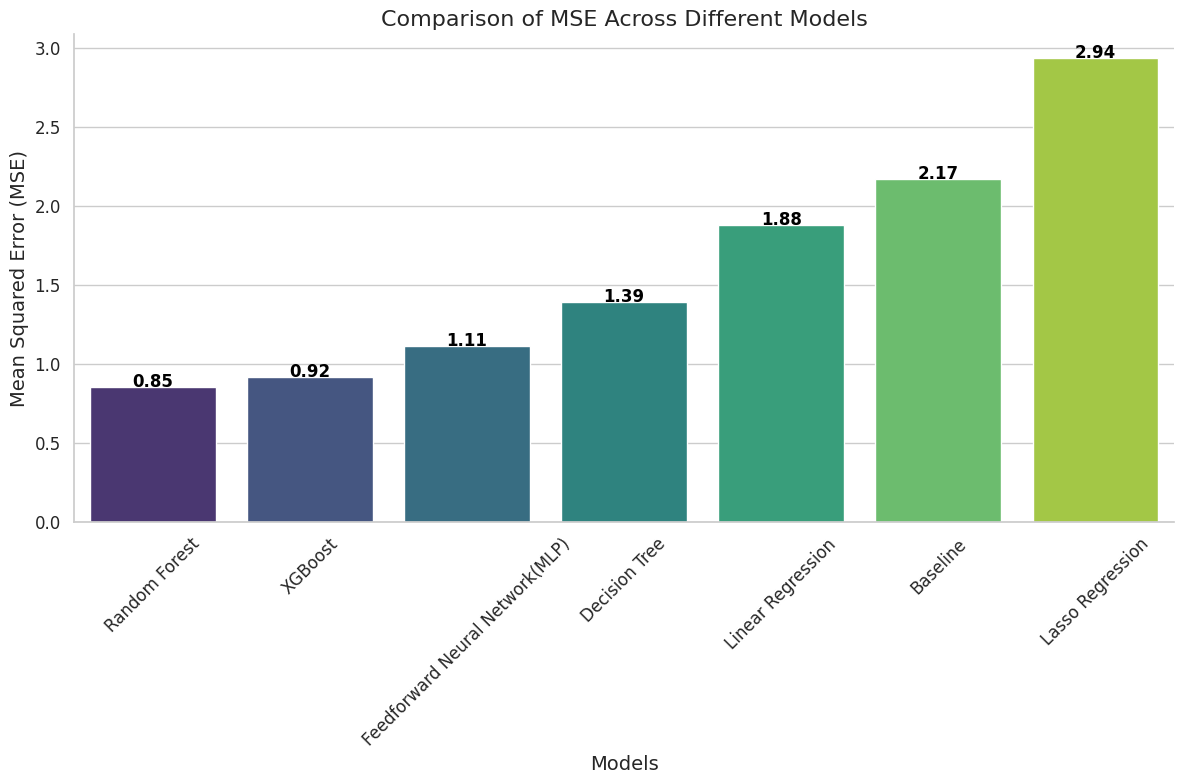

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sort the results based on MSE values
results_sorted = sorted(results, key=lambda x: x[1])

# Extracting Model Names and MSE for plotting after sorting
models_sorted = [item[0] for item in results_sorted]
mse_values_sorted = [item[1] for item in results_sorted]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=models_sorted, y=mse_values_sorted, palette='viridis')

# Adding the text labels for each bar
for i in range(len(models_sorted)):
    ax.text(i, mse_values_sorted[i], round(mse_values_sorted[i], 2), horizontalalignment='center', color='black', fontweight='bold')

plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Comparison of MSE Across Different Models', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Optional: Remove top and right borders
sns.despine()

plt.tight_layout()
plt.show()




# SHAP PLOT

In [ ]:

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)



In [ ]:
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns_after_transform, index=X_train.index)


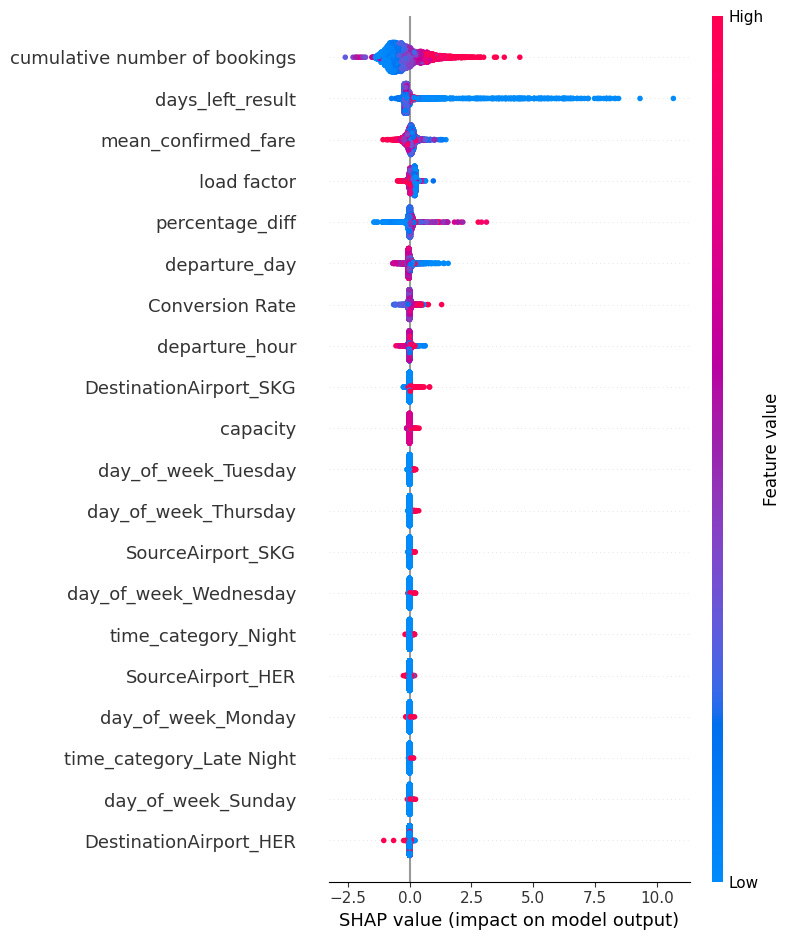

In [ ]:
#explainer = shap.TreeExplainer(model_mlp)

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)

explainer = shap.TreeExplainer(models['Random Forest'])

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)

shap.initjs()
shap_values = explainer.shap_values(X_test_transformed_df)
shap.summary_plot(shap_values, X_test_transformed_df)


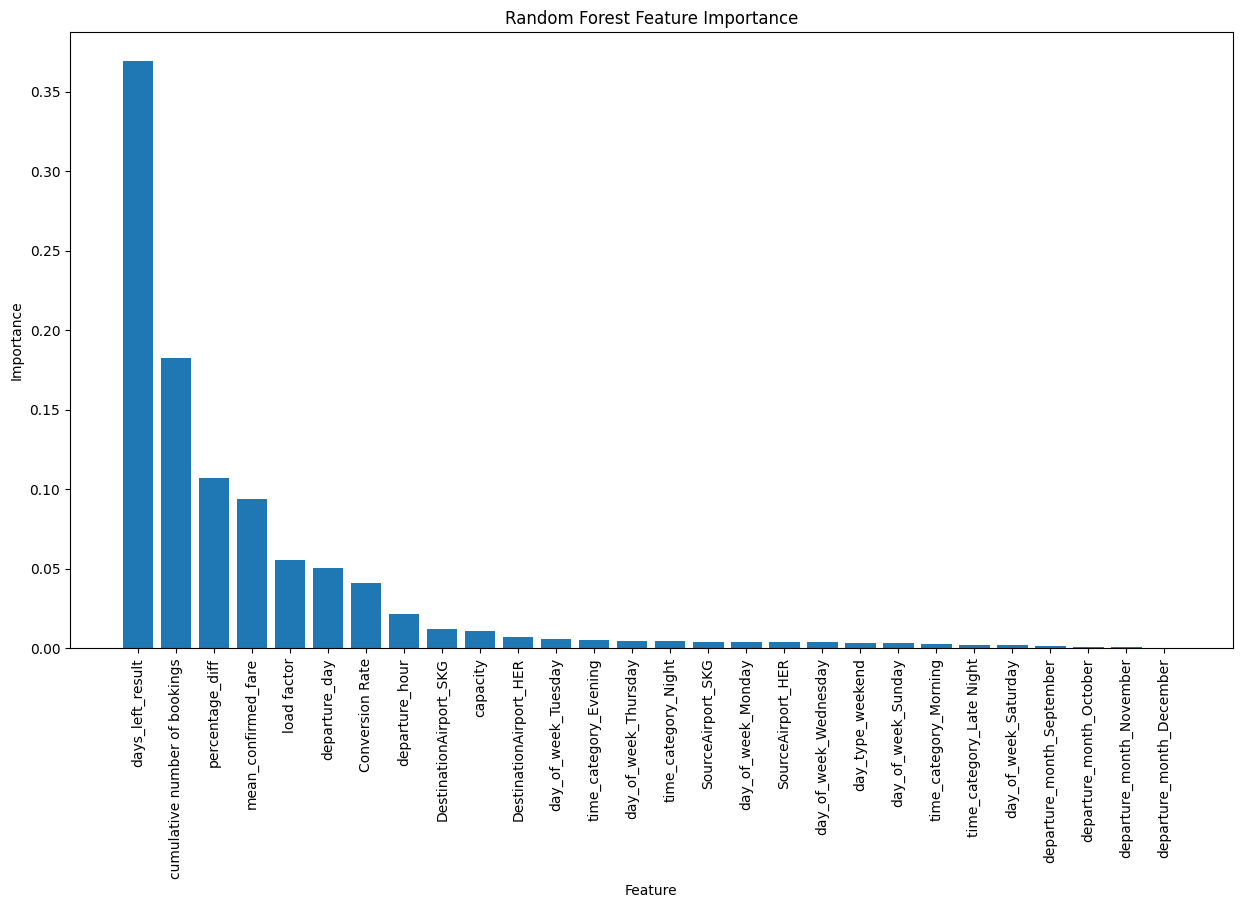

In [ ]:
# Assuming you've already run your code above...
# Extract the RandomForest model from the pipeline after training
random_forest_model = models['Random Forest']

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Get one-hot encoded feature names
ohe_feature_names = (model_pipeline.named_steps['preprocessor']
                                 .named_transformers_['cat']
                                 .named_steps['onehot']
                                 .get_feature_names_out(categorical_cols))

# Combine numerical and one-hot encoded feature names
all_feature_names = numerical_cols + list(ohe_feature_names)

# Create a DataFrame for the feature importances
feature_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.bar(feature_df['Feature'], feature_df['Importance'])
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

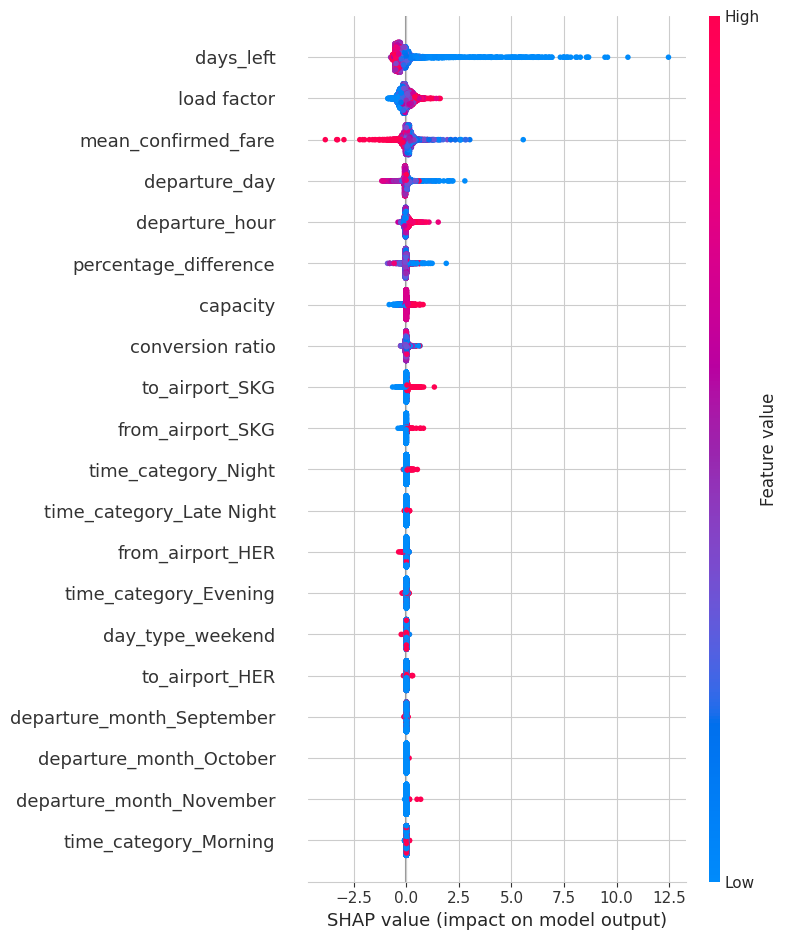

In [ ]:
#explainer = shap.TreeExplainer(model_mlp)

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)

explainer = shap.TreeExplainer(models['Random Forest'])

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)




# Load JS visualization code to notebook (for better plotting visuals)
shap.initjs()
shap_values = explainer.shap_values(X_test_transformed_df)
shap.summary_plot(shap_values, X_test_transformed_df)


# sensitivity analysis


In [ ]:
df_final_cleaned

,SourceAirport,DestinationAirport,dep,capacity,days_left_result,cre,mean_confirmed_fare,cumulative number of seats booked,cumulative number of bookings,number_of_bookings_on_given_day,...,departure_month,DepartureDate,day_type_weekend,departure_hour,percentage_diff,Conversion Rate,departure_time,time_category,day_of_week,days_left_bins
0,SKG,ATH,2023-10-07 07:00:00,186.0,86,2023-07-13,55.0,2.0,2.0,1.0,...,October,2023-10-07,1,7,1.528000,0.055794,07:00:00,Morning,Saturday,60-120
1,HER,ATH,2023-08-10 07:00:00,186.0,84,2023-05-17,56.5,11.0,4.0,2.0,...,August,2023-08-10,0,7,0.391327,0.199650,07:00:00,Morning,Thursday,60-120
2,HER,ATH,2023-10-16 07:00:00,186.0,67,2023-08-09,15.0,4.0,2.0,1.0,...,October,2023-10-16,0,7,19.172000,0.210000,07:00:00,Morning,Monday,60-120
3,HER,ATH,2023-10-16 07:00:00,186.0,68,2023-08-08,15.0,2.0,1.0,1.0,...,October,2023-10-16,0,7,2.926000,0.210000,07:00:00,Morning,Monday,60-120
4,HER,ATH,2023-08-10 07:00:00,186.0,72,2023-05-30,49.5,21.0,9.0,2.0,...,August,2023-08-10,0,7,0.529293,0.199650,07:00:00,Morning,Thursday,60-120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,ATH,HER,2023-09-22 23:30:00,186.0,76,2023-07-08,24.0,2.0,1.0,1.0,...,September,2023-09-22,0,23,2.252083,0.170659,23:30:00,Late Night,Friday,60-120
34106,ATH,HER,2023-09-22 23:30:00,186.0,39,2023-08-14,28.0,14.0,8.0,1.0,...,September,2023-09-22,0,23,2.319643,0.170659,23:30:00,Late Night,Friday,30-60
34107,ATH,HER,2023-09-22 23:30:00,186.0,44,2023-08-09,28.0,13.0,7.0,1.0,...,September,2023-09-22,0,23,2.292857,0.170659,23:30:00,Late Night,Friday,30-60
34108,ATH,HER,2023-09-22 23:30:00,186.0,54,2023-07-30,24.0,10.0,6.0,1.0,...,September,2023-09-22,0,23,2.551667,0.170659,23:30:00,Late Night,Friday,30-60


In [ ]:
df_final_cleaned['departure_month'].unique()

array(['October', 'August', 'September', 'December', 'November'],
      dtype=object)

In [ ]:
# Create bins for 'days_left_result'
bins = [0, 10, 30, 90, 180, 365]
labels = ['0-10', '10-30', '30-90','90-180','180-365']

df_final_cleaned['days_left_bins'] = pd.cut(df_final_cleaned['days_left_result'], bins=bins, labels=labels, right=False)

# Define numerical and categorical columns
numerical_cols = ['capacity', 'days_left_result', 'mean_confirmed_fare', 'departure_day', 'departure_hour', 'load factor', 'cumulative number of bookings', 'day_type_weekend', 'percentage_diff', 'Conversion Rate']
categorical_cols = ['SourceAirport', 'DestinationAirport', 'departure_month', 'time_category', 'day_of_week']

# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Handle unknown categories
])


# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define price increments
PRICE_INCREMENTS = [-0.5, -0.3, -0.1,-0.05, 0.05, 0.1, 0.3, 0.5]  # Adjust as necessary

# Group by 'SourceAirport' and 'DestinationAirport'
grouped_dfs = dict(tuple(df_final_cleaned.groupby(['SourceAirport', 'DestinationAirport'])))
final_results = {}

for key, group_df in grouped_dfs.items():
    print(f"Working on group: {key}")

    route_results = {}

    for days_bin in labels:
        filtered_group = group_df[group_df['days_left_bins'] == days_bin]
        X_features = filtered_group[numerical_cols + categorical_cols]
        y_target = filtered_group['number_of_bookings_on_given_day']

        if len(X_features) == 0:  # Skip if no data for this bin
            continue

        X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

        rf_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', RandomForestRegressor())
        ])

        rf_pipeline.fit(X_train, y_train)
        baseline_predictions = rf_pipeline.predict(X_test)
        baseline_demand = np.mean(baseline_predictions)

        price_sensitivity_data = []

        for increment in PRICE_INCREMENTS:
            X_test_adjusted = X_test.copy()
            X_test_adjusted['mean_confirmed_fare'] *= (1 + increment)
            adjusted_predictions = rf_pipeline.predict(X_test_adjusted)
            adjusted_demand = np.mean(adjusted_predictions)
            percent_change_demand = ((adjusted_demand - baseline_demand) / baseline_demand) * 100
            price_sensitivity_data.append({
                'price_increase': f"{int(increment*100)}%",
                'percent_change_demand': percent_change_demand
            })

        route_results[days_bin] = pd.DataFrame(price_sensitivity_data)

    final_results[key] = route_results




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Working on group: ('ATH', 'HER')
Working on group: ('ATH', 'SKG')
Working on group: ('HER', 'ATH')
Working on group: ('SKG', 'ATH')


Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [3] during transform. These unknown categories will be encoded as al

In [ ]:
for route, days_bins_data in final_results.items():
    route_title = f"Route: {route[0]} to {route[1]}"

    route_table = pd.DataFrame()

    for days_bin, sensitivity_df in days_bins_data.items():
        for _, row in sensitivity_df.iterrows():
            route_table.loc[days_bin, row['price_increase']] = row['percent_change_demand']

    route_table = route_table.applymap(lambda x: f"{x:.3f}" if isinstance(x, (int, float)) else x)

    styled_table = route_table.style.set_table_attributes("style='display:inline'").set_caption(route_title)
    display(styled_table)
    print("\n")


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
0-10,15.301,9.096,1.808,0.428,-1.254,-2.478,-6.121,-7.686
10-30,11.200,6.645,2.890,1.914,0.991,-0.866,-2.968,-3.841
30-90,6.555,3.774,1.879,2.326,3.102,1.796,2.022,0.148
90-180,6.135,3.787,1.492,0.851,0.915,1.201,1.393,1.948
180-365,0.246,-0.070,-0.082,-0.035,0.070,0.480,0.491,0.807


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
0-10,30.758,13.883,3.307,1.382,-1.435,-3.256,-9.545,-12.585
10-30,8.156,5.833,4.870,5.436,5.793,4.316,7.890,1.327
30-90,7.699,4.668,3.061,3.314,5.250,4.533,4.468,4.299
90-180,3.340,1.860,0.720,0.629,1.149,1.052,1.504,1.538
180-365,3.385,1.757,0.217,0.022,0.217,0.369,-0.586,-0.759


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
0-10,10.701,5.053,1.097,1.791,0.077,-1.003,-1.728,-4.062
10-30,18.576,12.678,3.687,5.030,2.239,-0.897,-9.808,-14.055
30-90,8.733,5.492,5.511,9.859,9.031,3.218,0.481,-1.460
90-180,14.165,6.413,2.273,1.960,1.179,1.081,0.756,0.881
180-365,2.187,0.502,0.749,0.120,0.494,0.517,1.034,0.240


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
0-10,5.168,2.582,0.558,0.856,-0.298,-1.265,-3.182,-3.867
10-30,10.679,9.371,9.897,10.689,6.882,4.989,2.450,-2.651
30-90,20.695,13.276,9.841,10.488,9.134,5.892,5.861,2.899
90-180,6.488,3.222,5.460,1.985,5.565,5.449,2.362,2.468
180-365,-0.101,-0.135,0.034,0.084,-0.017,0.000,0.051,-0.084


# different departure month


In [42]:
df_filtered = df_final_cleaned[df_final_cleaned['days_left_result'] < 90]
df_filtered

,SourceAirport,DestinationAirport,dep,capacity,days_left_result,cre,mean_confirmed_fare,cumulative number of seats booked,cumulative number of bookings,number_of_bookings_on_given_day,...,departure_day,departure_month,DepartureDate,day_type_weekend,departure_hour,percentage_diff,Conversion Rate,departure_time,time_category,day_of_week
0,SKG,ATH,2023-10-07 07:00:00,186.0,86,2023-07-13,55.0,2.0,2.0,1.0,...,7,October,2023-10-07,1,7,1.528000,0.055794,07:00:00,Morning,Saturday
1,HER,ATH,2023-08-10 07:00:00,186.0,84,2023-05-17,56.5,11.0,4.0,2.0,...,10,August,2023-08-10,0,7,0.391327,0.199650,07:00:00,Morning,Thursday
2,HER,ATH,2023-10-16 07:00:00,186.0,67,2023-08-09,15.0,4.0,2.0,1.0,...,16,October,2023-10-16,0,7,19.172000,0.210000,07:00:00,Morning,Monday
3,HER,ATH,2023-10-16 07:00:00,186.0,68,2023-08-08,15.0,2.0,1.0,1.0,...,16,October,2023-10-16,0,7,2.926000,0.210000,07:00:00,Morning,Monday
4,HER,ATH,2023-08-10 07:00:00,186.0,72,2023-05-30,49.5,21.0,9.0,2.0,...,10,August,2023-08-10,0,7,0.529293,0.199650,07:00:00,Morning,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,ATH,HER,2023-09-22 23:30:00,186.0,76,2023-07-08,24.0,2.0,1.0,1.0,...,22,September,2023-09-22,0,23,2.252083,0.170659,23:30:00,Late Night,Friday
34106,ATH,HER,2023-09-22 23:30:00,186.0,39,2023-08-14,28.0,14.0,8.0,1.0,...,22,September,2023-09-22,0,23,2.319643,0.170659,23:30:00,Late Night,Friday
34107,ATH,HER,2023-09-22 23:30:00,186.0,44,2023-08-09,28.0,13.0,7.0,1.0,...,22,September,2023-09-22,0,23,2.292857,0.170659,23:30:00,Late Night,Friday
34108,ATH,HER,2023-09-22 23:30:00,186.0,54,2023-07-30,24.0,10.0,6.0,1.0,...,22,September,2023-09-22,0,23,2.551667,0.170659,23:30:00,Late Night,Friday


In [43]:
x = df_filtered[df_filtered['departure_month'] == 'November']
x

,SourceAirport,DestinationAirport,dep,capacity,days_left_result,cre,mean_confirmed_fare,cumulative number of seats booked,cumulative number of bookings,number_of_bookings_on_given_day,...,departure_day,departure_month,DepartureDate,day_type_weekend,departure_hour,percentage_diff,Conversion Rate,departure_time,time_category,day_of_week
2670,SKG,ATH,2023-11-04 07:30:00,186.0,85,2023-08-10,5.990000,5.0,1.0,1.0,...,4,November,2023-11-04,1,7,8.340568,0.135714,07:30:00,Morning,Saturday
2856,ATH,HER,2023-11-09 07:30:00,186.0,87,2023-08-13,13.000000,4.0,2.0,2.0,...,9,November,2023-11-09,0,7,4.236923,0.289474,07:30:00,Morning,Thursday
2905,SKG,ATH,2023-11-08 07:30:00,186.0,86,2023-08-13,5.990000,4.0,4.0,1.0,...,8,November,2023-11-08,0,7,8.388982,0.156863,07:30:00,Morning,Wednesday
2933,SKG,ATH,2023-11-07 07:30:00,186.0,87,2023-08-11,11.990000,10.0,9.0,1.0,...,7,November,2023-11-07,0,7,3.645538,0.203704,07:30:00,Morning,Tuesday
2986,ATH,HER,2023-11-03 07:30:00,186.0,84,2023-08-11,10.166667,6.0,2.0,1.0,...,3,November,2023-11-03,0,7,4.971475,0.164706,07:30:00,Morning,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30724,ATH,SKG,2023-11-02 22:10:00,186.0,88,2023-08-06,9.000000,4.0,4.0,1.0,...,2,November,2023-11-02,0,22,3.841111,0.157895,22:10:00,Late Night,Thursday
30789,ATH,SKG,2023-11-09 22:10:00,186.0,88,2023-08-13,6.000000,2.0,2.0,1.0,...,9,November,2023-11-09,0,22,22.835000,0.186207,22:10:00,Late Night,Thursday
30790,ATH,SKG,2023-11-12 22:10:00,186.0,89,2023-08-14,12.000000,9.0,9.0,1.0,...,12,November,2023-11-12,1,22,4.650833,0.079545,22:10:00,Late Night,Sunday
30794,ATH,SKG,2023-11-10 22:10:00,186.0,89,2023-08-13,24.000000,4.0,1.0,1.0,...,10,November,2023-11-10,0,22,1.818750,0.120000,22:10:00,Late Night,Friday


In [44]:
month_label = list(df_filtered['departure_month'].unique())
month_label

['October', 'August', 'September', 'November']

In [45]:
month_label = ['October', 'August', 'September']


In [46]:

# Define numerical and categorical columns
numerical_cols = ['capacity', 'days_left_result', 'mean_confirmed_fare', 'departure_day', 'departure_hour', 'load factor', 'cumulative number of bookings', 'day_type_weekend', 'percentage_diff', 'Conversion Rate']
categorical_cols = ['SourceAirport', 'DestinationAirport', 'departure_month', 'time_category', 'day_of_week']

# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Handle unknown categories
])


# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define price increments
PRICE_INCREMENTS = [-0.5, -0.3, -0.1,-0.05, 0.05, 0.1, 0.3, 0.5]  # Adjust as necessary

# Group by 'SourceAirport' and 'DestinationAirport'
grouped_dfs = dict(tuple(df_filtered.groupby(['SourceAirport', 'DestinationAirport'])))
final_results = {}

for key, group_df in grouped_dfs.items():
    print(f"Working on group: {key}")

    route_results = {}

    for month in month_label:
        filtered_group = group_df[group_df['departure_month'] == month]
        X_features = filtered_group[numerical_cols + categorical_cols]
        y_target = filtered_group['number_of_bookings_on_given_day']

        if len(X_features) == 0:  # Skip if no data for this bin
            continue

        X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

        rf_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', RandomForestRegressor())
        ])

        rf_pipeline.fit(X_train, y_train)
        baseline_predictions = rf_pipeline.predict(X_test)
        baseline_demand = np.mean(baseline_predictions)

        price_sensitivity_data = []

        for increment in PRICE_INCREMENTS:
            X_test_adjusted = X_test.copy()
            X_test_adjusted['mean_confirmed_fare'] *= (1 + increment)
            adjusted_predictions = rf_pipeline.predict(X_test_adjusted)
            adjusted_demand = np.mean(adjusted_predictions)
            percent_change_demand = ((adjusted_demand - baseline_demand) / baseline_demand) * 100
            price_sensitivity_data.append({
                'price_increase': f"{int(increment*100)}%",
                'percent_change_demand': percent_change_demand
            })

        route_results[month] = pd.DataFrame(price_sensitivity_data)

    final_results[key] = route_results


Working on group: ('ATH', 'HER')
Working on group: ('ATH', 'SKG')
Working on group: ('HER', 'ATH')
Working on group: ('SKG', 'ATH')


In [47]:
for route, month in final_results.items():
    route_title = f"Route: {route[0]} to {route[1]}"

    route_table = pd.DataFrame()

    for days_bin, sensitivity_df in month.items():
        for _, row in sensitivity_df.iterrows():
            route_table.loc[days_bin, row['price_increase']] = row['percent_change_demand']

    route_table = route_table.applymap(lambda x: f"{x:.3f}" if isinstance(x, (int, float)) else x)

    styled_table = route_table.style.set_table_attributes("style='display:inline'").set_caption(route_title)

    display(styled_table)
    print("\n")

,-50%,-30%,-10%,-5%,5%,10%,30%,50%
October,4.968,3.068,1.485,1.023,0.548,0.548,-0.779,-0.901
August,12.673,6.629,2.479,1.783,0.604,-1.183,-4.893,-6.619
September,6.689,3.543,1.922,2.466,3.383,2.211,4.636,4.876


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
October,2.072,1.679,0.827,1.245,3.008,6.216,5.731,8.555
August,16.510,9.464,4.157,3.748,3.208,1.555,-0.477,-3.306
September,7.126,3.467,2.485,2.622,4.113,3.744,3.907,4.739


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
October,4.417,1.555,-0.697,0.826,1.796,2.790,6.510,10.782
August,21.115,14.475,4.613,7.397,4.383,1.064,-2.832,-5.846
September,6.535,4.884,4.397,5.234,3.713,1.193,-4.224,-2.431


,-50%,-30%,-10%,-5%,5%,10%,30%,50%
October,23.007,14.853,4.574,3.821,0.269,0.933,-0.484,-0.780
August,6.935,5.883,5.987,6.778,5.221,3.137,0.311,-3.135
September,18.137,11.692,8.358,6.119,4.893,4.182,1.965,-0.360


Working on group: ('ATH', 'HER')


,price_increase,percent_change_demand
0,-50%,12.358734
1,-30%,7.110360
2,-10%,3.390385
3,10%,0.529816
4,30%,-0.875395
5,50%,-2.292961


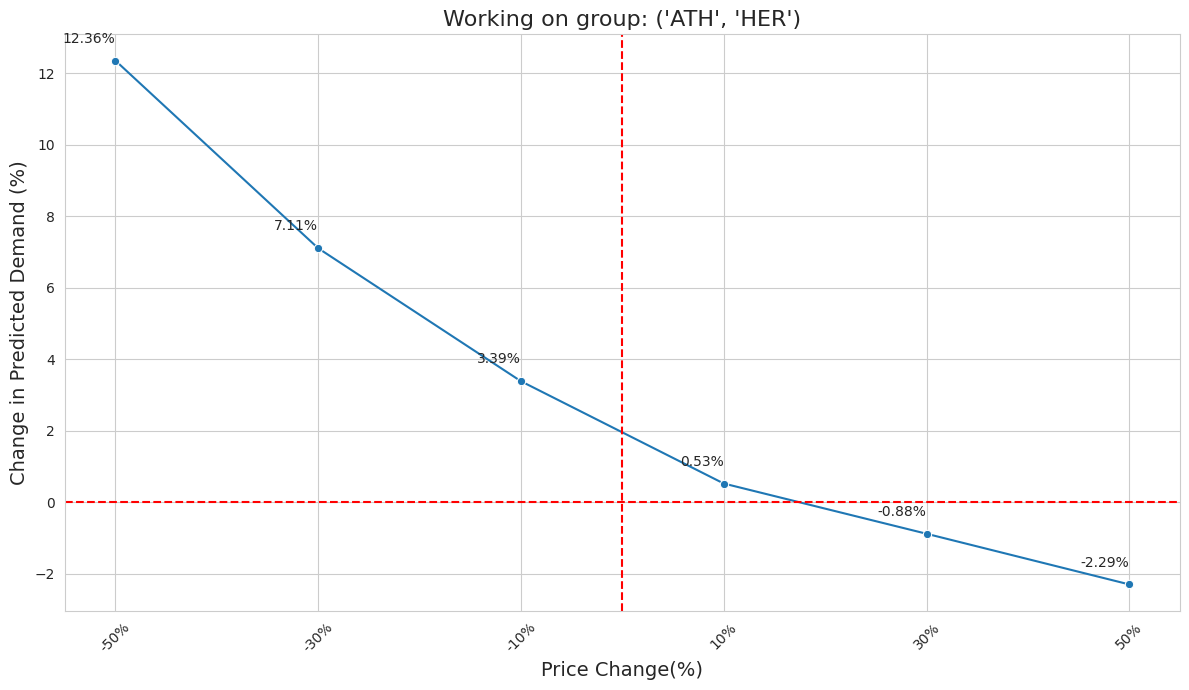

Working on group: ('ATH', 'LCA')


,price_increase,percent_change_demand
0,-50%,12.590194
1,-30%,8.350763
2,-10%,3.997514
3,10%,2.133155
4,30%,2.494351
5,50%,2.385992


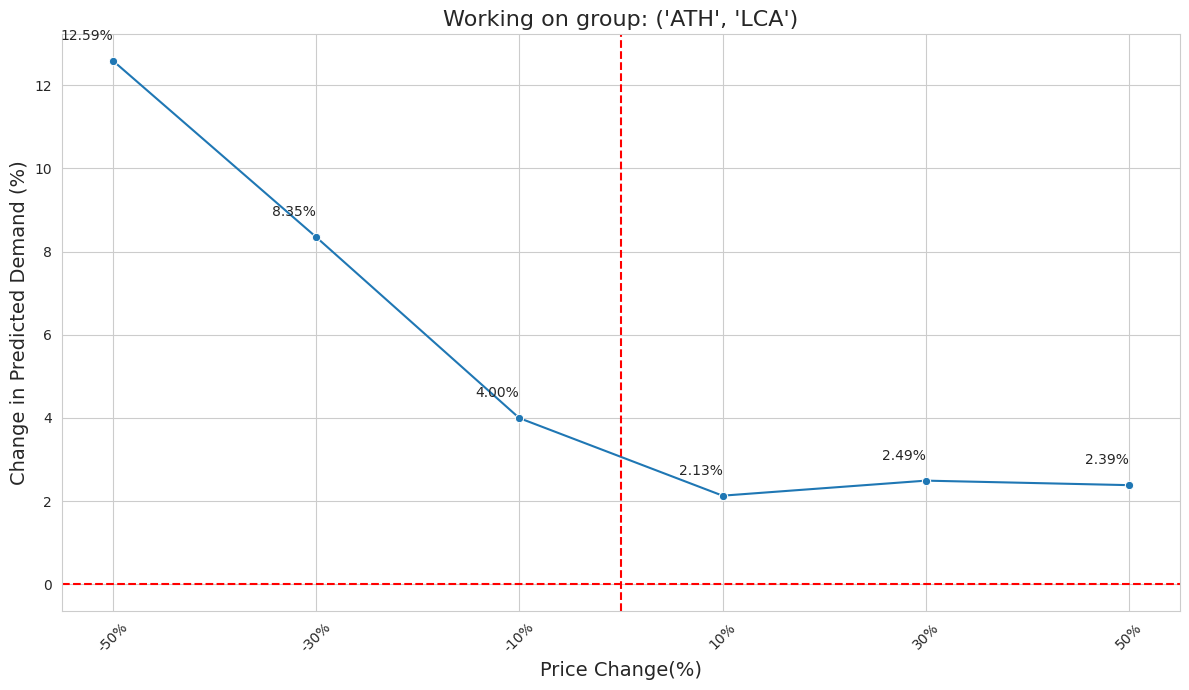

Working on group: ('ATH', 'SKG')


,price_increase,percent_change_demand
0,-50%,27.065928
1,-30%,13.183444
2,-10%,6.231893
3,10%,3.239154
4,30%,0.344364
5,50%,-3.097560


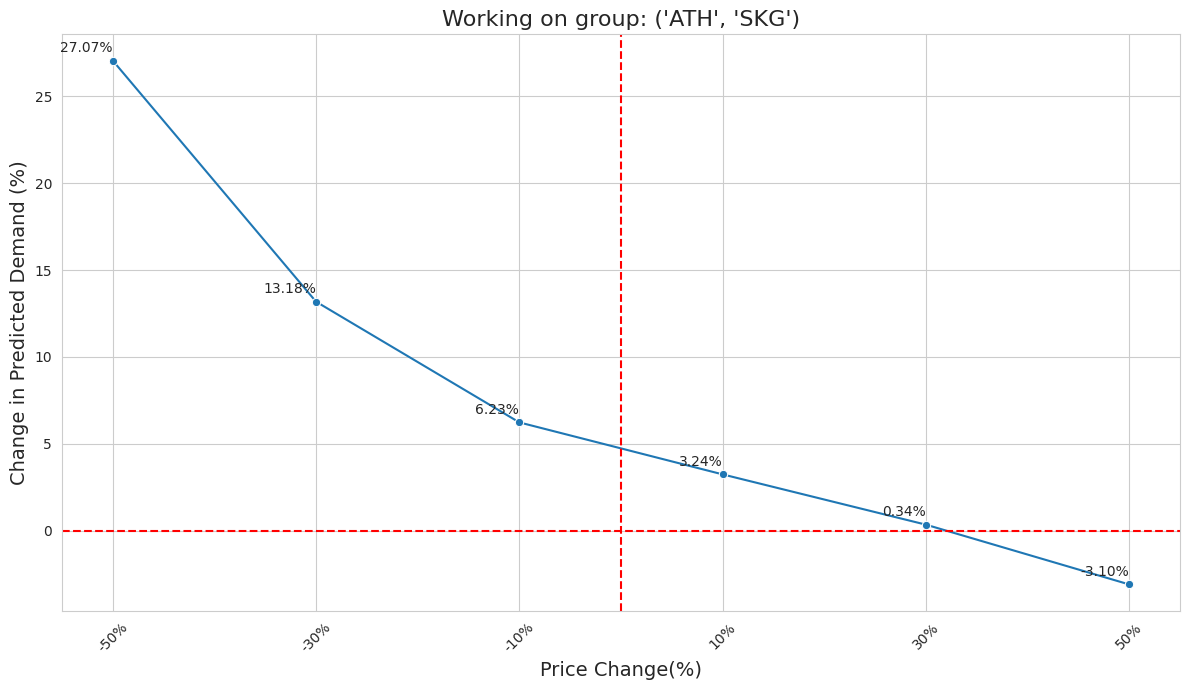

Working on group: ('HER', 'ATH')


,price_increase,percent_change_demand
0,-50%,16.400188
1,-30%,11.452940
2,-10%,6.095215
3,10%,3.276647
4,30%,-0.088681
5,50%,-1.571160


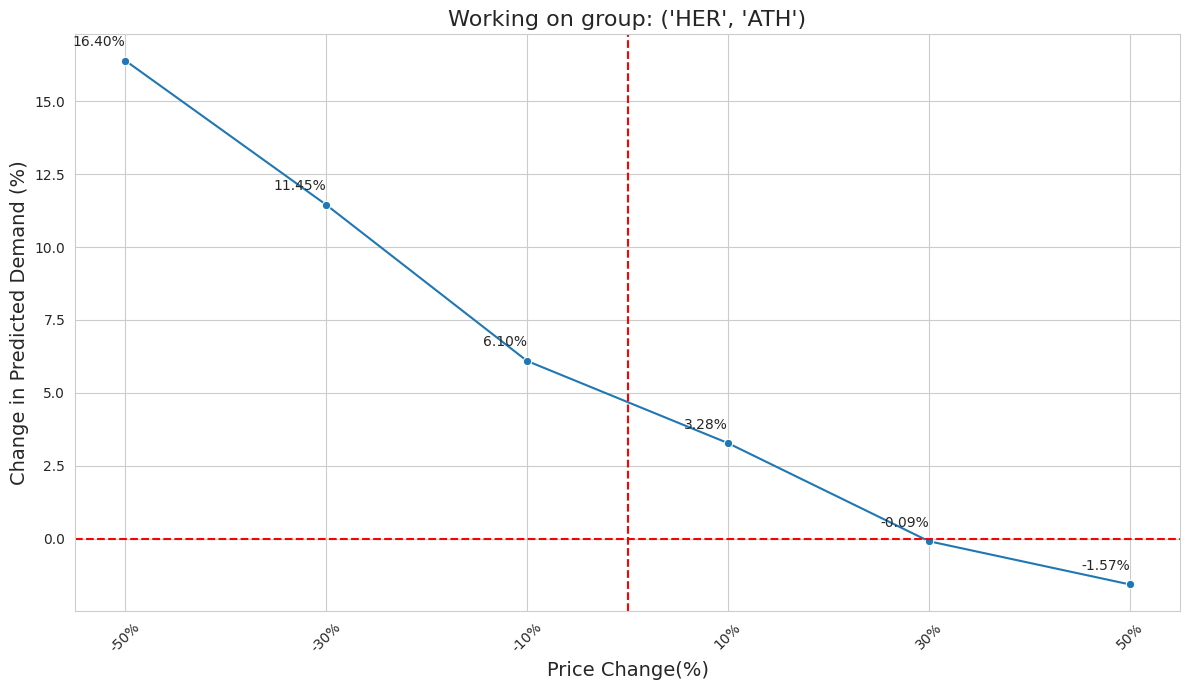

Working on group: ('LCA', 'ATH')


,price_increase,percent_change_demand
0,-50%,12.821691
1,-30%,8.613670
2,-10%,3.476122
3,10%,0.886754
4,30%,0.626550
5,50%,0.413079


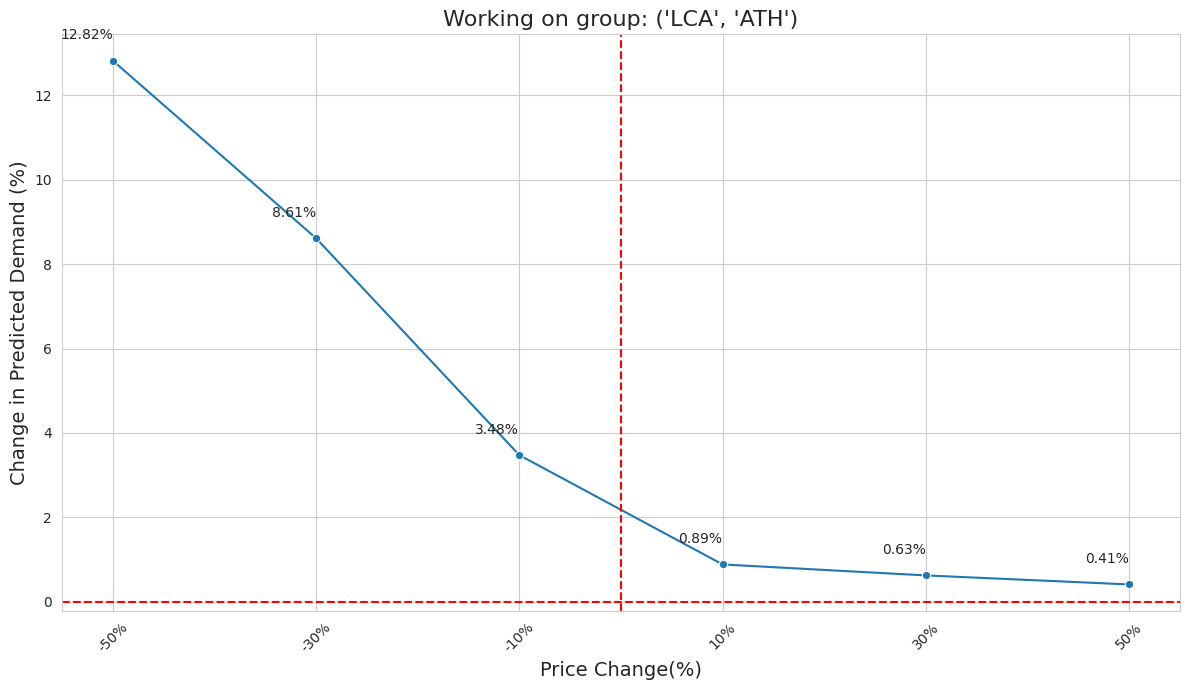

Working on group: ('SKG', 'ATH')


,price_increase,percent_change_demand
0,-50%,16.059170
1,-30%,10.501352
2,-10%,8.735168
3,10%,5.322411
4,30%,2.242405
5,50%,-1.165580


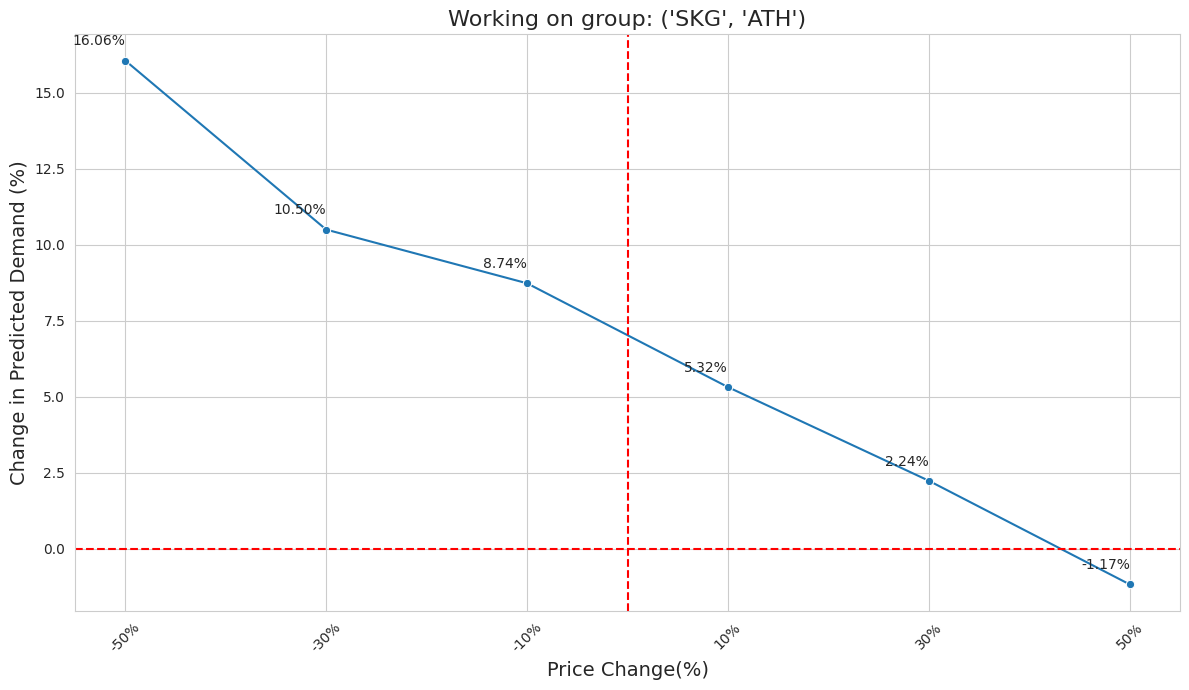

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

PRICE_INCREMENTS = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]  # 1%, 5%,3%, 10% 30% 50% etc. Adjust as necessary.

# Now group by 'SourceAirport', 'DestinationAirport', and 'departure_month'
grouped_dfs = dict(tuple(df_final.groupby(['SourceAirport', 'DestinationAirport'])))
for key, group_df in grouped_dfs.items():
    # 'key' is a tuple like (SourceAirport, DestinationAirport, departure_month)
    # 'group_df' is the corresponding DataFrame
    # Perform operations on 'group_df' here
    print(f"Working on group: {key}")
    X_features = group_df[['from_airport','to_airport','departure_hour','departure_day','departure_month','days left','load factor','cumulative number of bookings','capacity','mean_confirmed_fare','day_type_weekend','conversion ratio','AegeanAirways_Y','DayOfWeek','Percentage Difference','time_category']]
    y_target = group_df['number_of_bookings_on_given_day']

    # Split the data into training and test sets (80% training, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

    # Price sensitivity analysis results
    price_sensitivity_data = []

    # Create a full pipeline with the preprocessor and the Random Forest model
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ])

    # Fit the Random Forest model to the training data
    rf_pipeline.fit(X_train, y_train)

    # Baseline predictions on the test set
    baseline_predictions = rf_pipeline.predict(X_test)
    baseline_demand = np.mean(baseline_predictions)

    for increment in PRICE_INCREMENTS:
        # Adjust price in the test set
        X_test_adjusted = X_test.copy()
        X_test_adjusted['mean_confirmed_fare'] = X_test_adjusted['mean_confirmed_fare'] * (1 + increment)

        # Predict bookings with new price using the test set
        adjusted_predictions = rf_pipeline.predict(X_test_adjusted)
        adjusted_demand = np.mean(adjusted_predictions)

        # Calculate % change in quantity demanded
        percent_change_demand = ((adjusted_demand - baseline_demand) / baseline_demand) * 100

        # Store results
        price_sensitivity_data.append({
            'price_increase': f"{int(increment*100)}%",
            'percent_change_demand': percent_change_demand
        })

    # Convert results to DataFrame for better visualization
    price_sensitivity_df = pd.DataFrame(price_sensitivity_data)

    display(price_sensitivity_df)


    # Set seaborn style
    sns.set_style("whitegrid")

    # Visualize the results
    plt.figure(figsize=(12, 7))
    plot = sns.lineplot(x='price_increase', y='percent_change_demand', data=price_sensitivity_df, marker="o")

    # Title and labels
    plt.title(f"Working on group: {key}", fontsize=16)
    plt.xlabel('Price Change(%)', fontsize=14)
    plt.ylabel('Change in Predicted Demand (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0%
    plt.axvline(2.5, color='red', linestyle='--')  # Add a vertical line at x=0

    # Annotate each point above the line with its y-value
    for x, y in zip(price_sensitivity_df['price_increase'], price_sensitivity_df['percent_change_demand']):
      plot.text(x, y + 0.5, f"{y:.2f}%", horizontalalignment='right')

    # Show the plot
    plt.tight_layout()
    plt.show()



KeyError: ignored

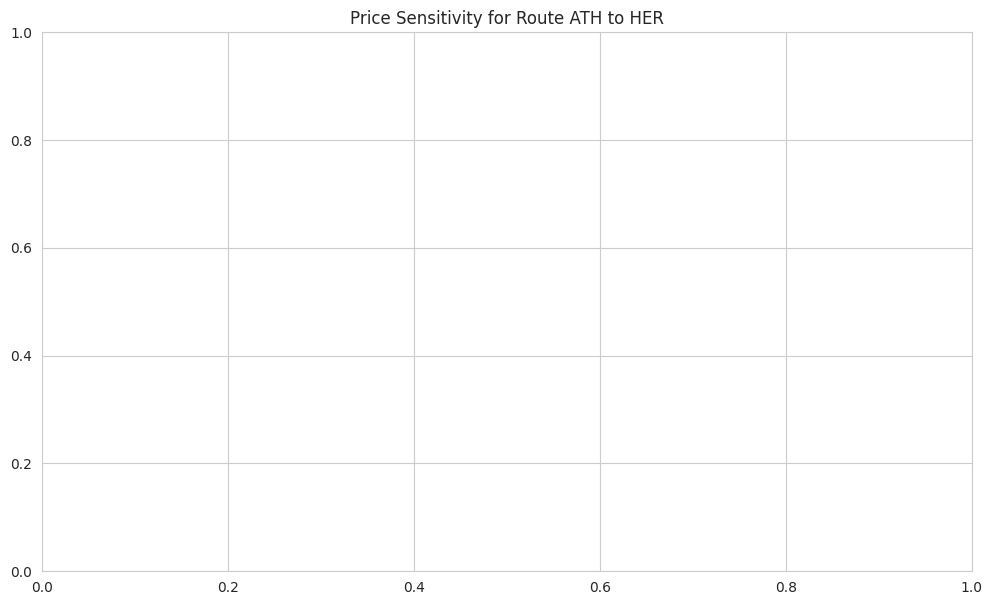

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


PRICE_INCREMENTS = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]

# Group by 'SourceAirport' and 'DestinationAirport'
grouped_routes = df_final.groupby(['SourceAirport', 'DestinationAirport'])

# Set seaborn style
sns.set_style("whitegrid")

# Iterate over each route
for (source_airport, destination_airport), route_df in grouped_routes:
    plt.figure(figsize=(12, 7))
    plt.title(f"Price Sensitivity for Route {source_airport} to {destination_airport}")

    # Group by 'days_left_category' within each route
    for days_left_label in days_left_labels:
        days_left_group = route_df[route_df['days_left_category'] == days_left_label]

        # Skip if the category is empty
        if days_left_group.empty:
            continue

        # Define features and target variable
        X = days_left_group[['departure_hour', 'departure_day', 'departure_month', 'days left',
                             'load_factor', 'cumulative number of bookings', 'capacity',
                             'mean_confirmed_fare', 'day_type_weekend', 'conversion ratio',
                             'AegeanAirways_Y', 'DayOfWeek', 'Percentage Difference', 'time_category']]
        y = days_left_group['number_of_bookings_on_given_day']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create a pipeline and fit the model
        rf_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', RandomForestRegressor(random_state=42))
        ])
        rf_pipeline.fit(X_train, y_train)

        # Baseline predictions
        baseline_predictions = rf_pipeline.predict(X_test)
        baseline_demand = np.mean(baseline_predictions)

        # Price sensitivity analysis
        price_sensitivity_data = []
        for increment in PRICE_INCREMENTS:
            X_test_adjusted = X_test.copy()
            X_test_adjusted['mean_confirmed_fare'] *= (1 + increment)
            adjusted_predictions = rf_pipeline.predict(X_test_adjusted)
            adjusted_demand = np.mean(adjusted_predictions)
            percent_change_demand = ((adjusted_demand - baseline_demand) / baseline_demand) * 100
            price_sensitivity_data.append({
                'price_increase': increment * 100,  # Convert to percentage
                'percent_change_demand': percent_change_demand,
                'days_left_category': days_left_label
            })

        # Create DataFrame for plotting
        price_sensitivity_df = pd.DataFrame(price_sensitivity_data)

        # Plotting
        sns.lineplot(data=price_sensitivity_df, x='price_increase', y='percent_change_demand', label=days_left_label)

    # Finalize plot
    plt.xlabel('Price Increase (%)')
    plt.ylabel('Change in Predicted Demand (%)')
    plt.axhline(0, color='red', linestyle='--')
    plt.legend(title='Days Left Category')
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Constants
PRICE_INCREMENTS = [-0.5, -0.4, -0.3, -0.2, -0.1,-0.05,0.05, 0.1, 0.2, 0.3, 0.4, 0.5]  # 1%, 5%,3%, 10% 30% 50% etc. Adjust as necessary.



# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Price sensitivity analysis results
price_sensitivity_data = []

# Create a full pipeline with the preprocessor and the Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Fit the Random Forest model to the training data
rf_pipeline.fit(X_train, y_train)

# Baseline predictions on the test set
baseline_predictions = rf_pipeline.predict(X_test)
baseline_demand = np.mean(baseline_predictions)

for increment in PRICE_INCREMENTS:
    # Adjust price in the test set
    X_test_adjusted = X_test.copy()
    X_test_adjusted['mean_confirmed_fare'] = X_test_adjusted['mean_confirmed_fare'] * (1 + increment)

    # Predict bookings with new price using the test set
    adjusted_predictions = rf_pipeline.predict(X_test_adjusted)
    adjusted_demand = np.mean(adjusted_predictions)

    # Calculate % change in quantity demanded
    percent_change_demand = ((adjusted_demand - baseline_demand) / baseline_demand) * 100

    # Store results
    price_sensitivity_data.append({
        'price_increase': f"{int(increment*100)}%",
        'percent_change_demand': percent_change_demand
    })

# Convert results to DataFrame for better visualization
price_sensitivity_df = pd.DataFrame(price_sensitivity_data)

display(price_sensitivity_df)


,price_increase,percent_change_demand
0,-50%,19.884643
1,-40%,14.759067
2,-30%,10.378251
3,-20%,6.880660
4,-10%,4.524242
5,-5%,3.986398
6,5%,1.493327
7,10%,0.245492
8,20%,-1.445922
9,30%,-2.548216


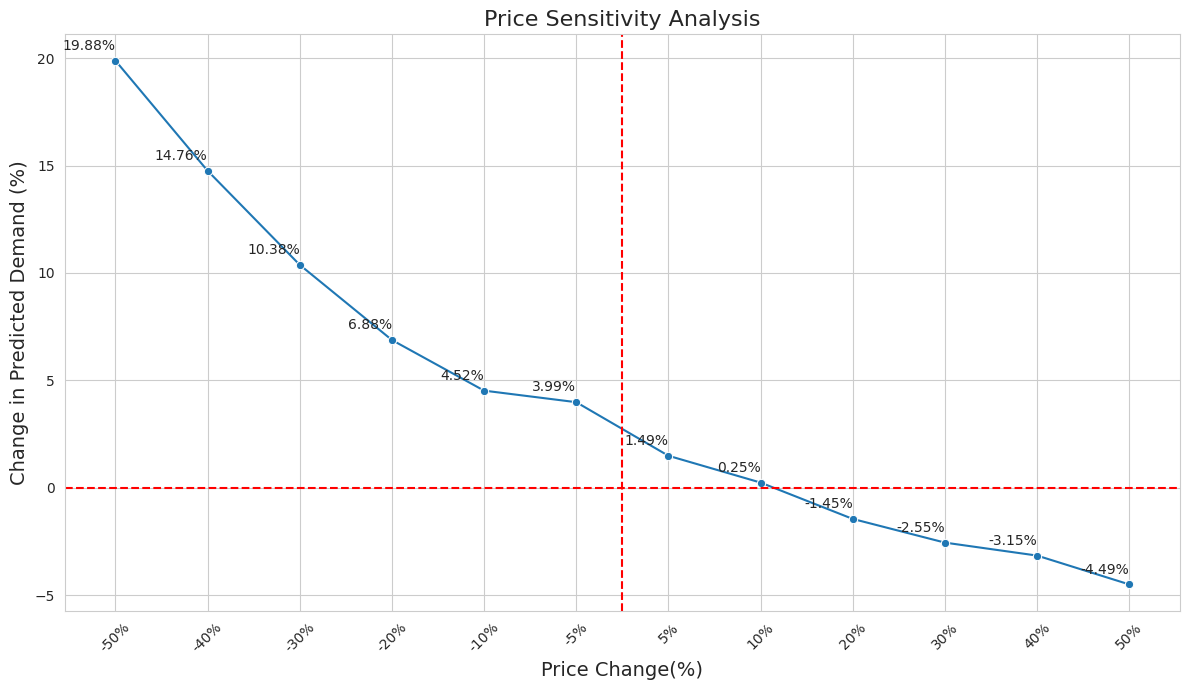

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Visualize the results
plt.figure(figsize=(12, 7))
plot = sns.lineplot(x='price_increase', y='percent_change_demand', data=price_sensitivity_df, marker="o")

# Title and labels
plt.title('Price Sensitivity Analysis', fontsize=16)
plt.xlabel('Price Change(%)', fontsize=14)
plt.ylabel('Change in Predicted Demand (%)', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0%
plt.axvline(5.5, color='red', linestyle='--')  # Add a vertical line at x=0

# Annotate each point above the line with its y-value
for x, y in zip(price_sensitivity_df['price_increase'], price_sensitivity_df['percent_change_demand']):
  plot.text(x, y + 0.5, f"{y:.2f}%", horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()




In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn

# Assuming NeuralNet class and other necessary imports are already included

# Constants
PRICE_INCREMENTS = [-0.5, -0.4, -0.3, -0.2, -0.1, -0.05, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors and move to GPU
X_train_transformed = torch.tensor(preprocessor.fit_transform(X_train).astype('float32')).cuda()
y_train_tensor = torch.tensor(y_train.values.astype('float32')).cuda()

X_test_transformed = torch.tensor(preprocessor.transform(X_test).astype('float32')).cuda()
y_test_tensor = torch.tensor(y_test.values.astype('float32')).cuda()


# NeuralNet instance
input_dim = X_train_transformed.shape[1]
model_mlp = NeuralNet(input_dim).cuda()  # Assuming you're using a GPU


# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.001, weight_decay=0.005) # 0.01 is the L2 regularization strength


# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model_mlp(X_train_transformed)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# Evaluate baseline predictions
model_mlp.eval()
with torch.no_grad():
    baseline_predictions = model_mlp(X_train_transformed)
baseline_demand = torch.mean(baseline_predictions).item()



# Evaluate the model
model_mlp.eval()
with torch.no_grad():
    test_outputs = model_mlp(X_test_transformed)
    test_loss = criterion(test_outputs.squeeze(), y_test_tensor)
print(f'Test MSE Loss: {test_loss.item():.4f}')


Test MSE Loss: 1.1049


In [ ]:
# Price sensitivity analysis results
price_sensitivity_data = []
# Get feature names after transformation
transformed_columns = preprocessor.get_feature_names_out()
print(transformed_columns)
# Get the index of 'mean_confirmed_fare' in the transformed feature names
column_index = list(transformed_columns).index('num__mean_confirmed_fare')
print(column_index)
for increment in PRICE_INCREMENTS:
    # Adjust price in the test set
    X_test_adjusted = X_test_transformed.clone()
    X_test_adjusted[:, column_index] = X_test_adjusted[:, column_index] * (1 + increment)

    # Predict bookings with new price
    with torch.no_grad():
        adjusted_predictions = model_mlp(X_test_adjusted)
    adjusted_demand = torch.mean(adjusted_predictions).item()

    # Calculate % change in quantity demanded
    percent_change_demand = ((adjusted_demand - baseline_demand) / baseline_demand) * 100

    # Store results
    price_sensitivity_data.append({
        'price_increase': f"{int(increment*100)}%",
        'percent_change_demand': percent_change_demand
    })

# Convert results to DataFrame for better visualization
price_sensitivity_df = pd.DataFrame(price_sensitivity_data)
display(price_sensitivity_df)



['num__capacity' 'num__days_left' 'num__mean_confirmed_fare'
 'num__departure_day' 'num__departure_hour' 'num__load factor'
 'num__day_type_weekend' 'num__conversion ratio'
 'num__percentage_difference' 'cat__to_airport_HER' 'cat__to_airport_SKG'
 'cat__from_airport_HER' 'cat__from_airport_SKG'
 'cat__departure_month_December' 'cat__departure_month_November'
 'cat__departure_month_October' 'cat__departure_month_September'
 'cat__time_category_Evening' 'cat__time_category_Late Night'
 'cat__time_category_Morning' 'cat__time_category_Night']
2


,price_increase,percent_change_demand
0,-50%,0.635073
1,-40%,0.284161
2,-30%,-0.192466
3,-20%,-0.744308
4,-10%,-1.373775
5,-5%,-1.716190
6,5%,-2.457114
7,10%,-2.844850
8,20%,-3.667143
9,30%,-4.497386


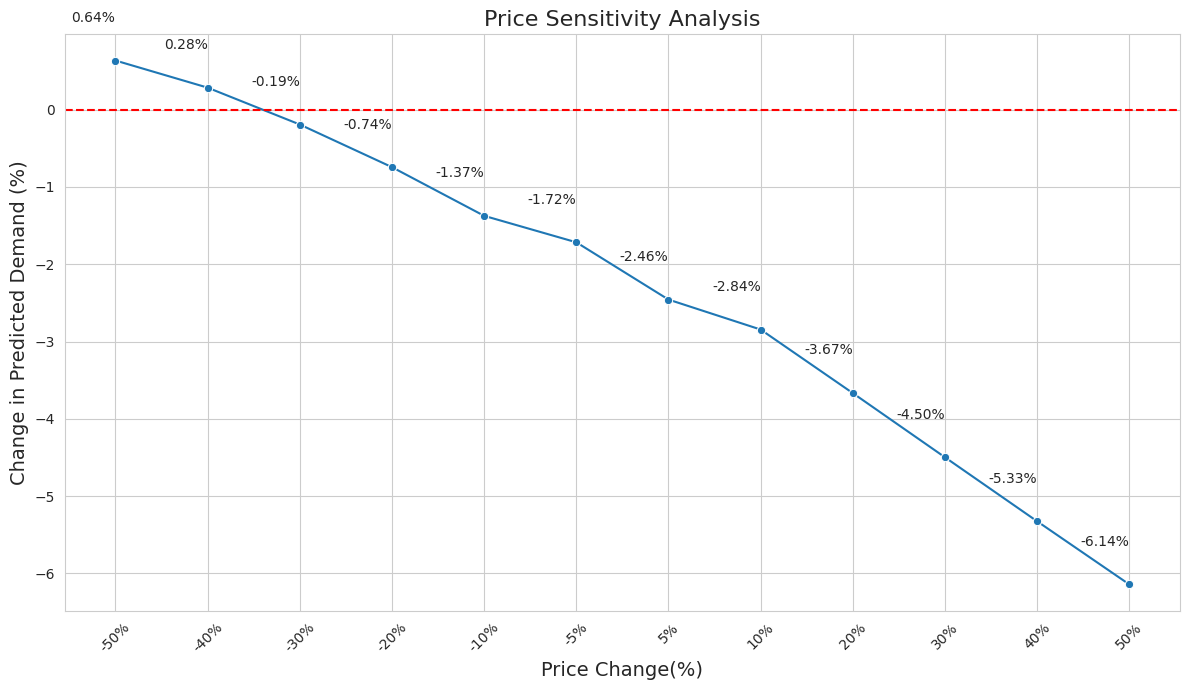

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Visualize the results
plt.figure(figsize=(12, 7))
plot = sns.lineplot(x='price_increase', y='percent_change_demand', data=price_sensitivity_df, marker="o")

# Title and labels
plt.title('Price Sensitivity Analysis', fontsize=16)
plt.xlabel('Price Change(%)', fontsize=14)
plt.ylabel('Change in Predicted Demand (%)', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0%

# Annotate each point above the line with its y-value
for x, y in zip(price_sensitivity_df['price_increase'], price_sensitivity_df['percent_change_demand']):
  plot.text(x, y + 0.5, f"{y:.2f}%", horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()



# not useful
feature importance



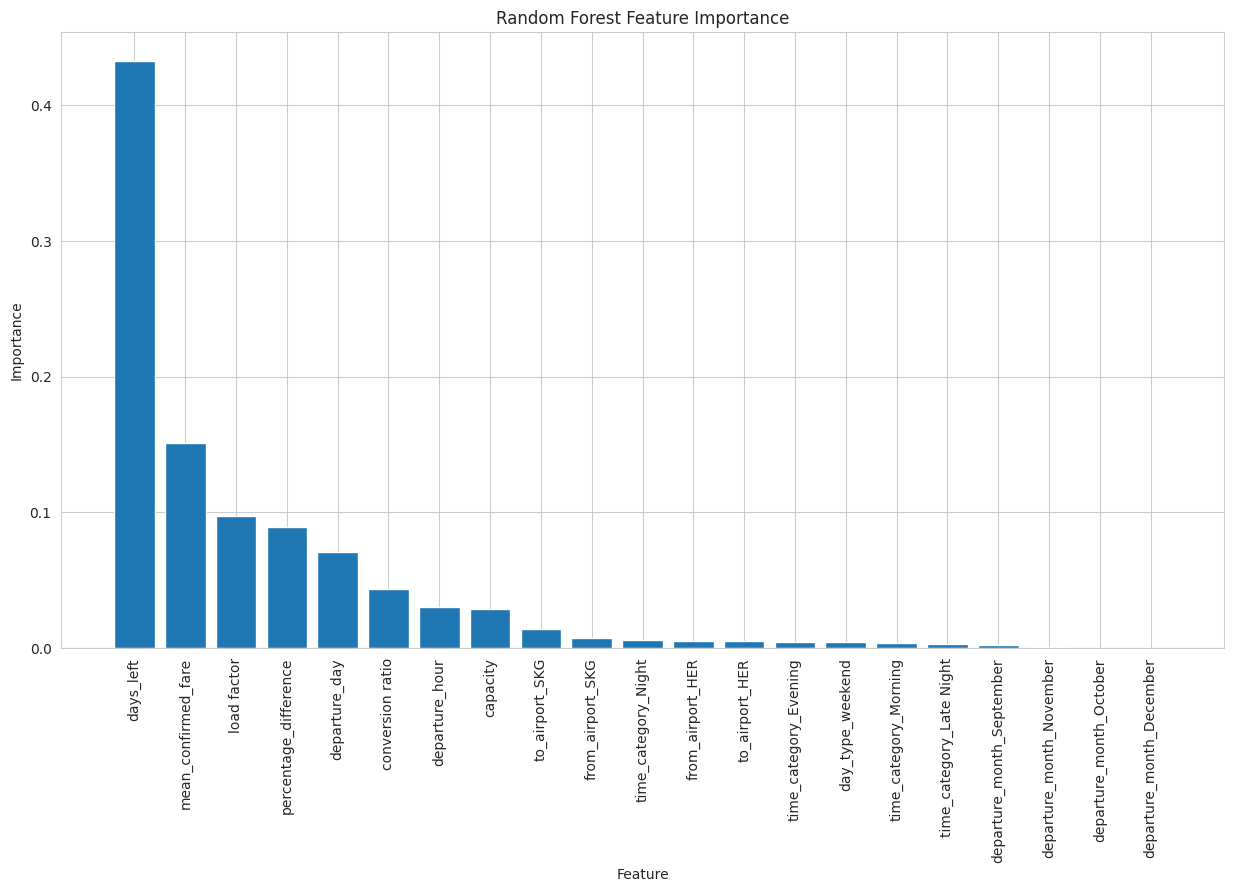

In [ ]:
# Assuming you've already run your code above...
# Extract the RandomForest model from the pipeline after training
random_forest_model = models['Random Forest']

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Get one-hot encoded feature names
ohe_feature_names = (model_pipeline.named_steps['preprocessor']
                                 .named_transformers_['cat']
                                 .named_steps['onehot']
                                 .get_feature_names_out(categorical_cols))

# Combine numerical and one-hot encoded feature names
all_feature_names = numerical_cols + list(ohe_feature_names)

# Create a DataFrame for the feature importances
feature_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.bar(feature_df['Feature'], feature_df['Importance'])
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


# NOT USEFUL :
SHAP PLOT

In [ ]:

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)



In [ ]:
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns_after_transform, index=X_train.index)


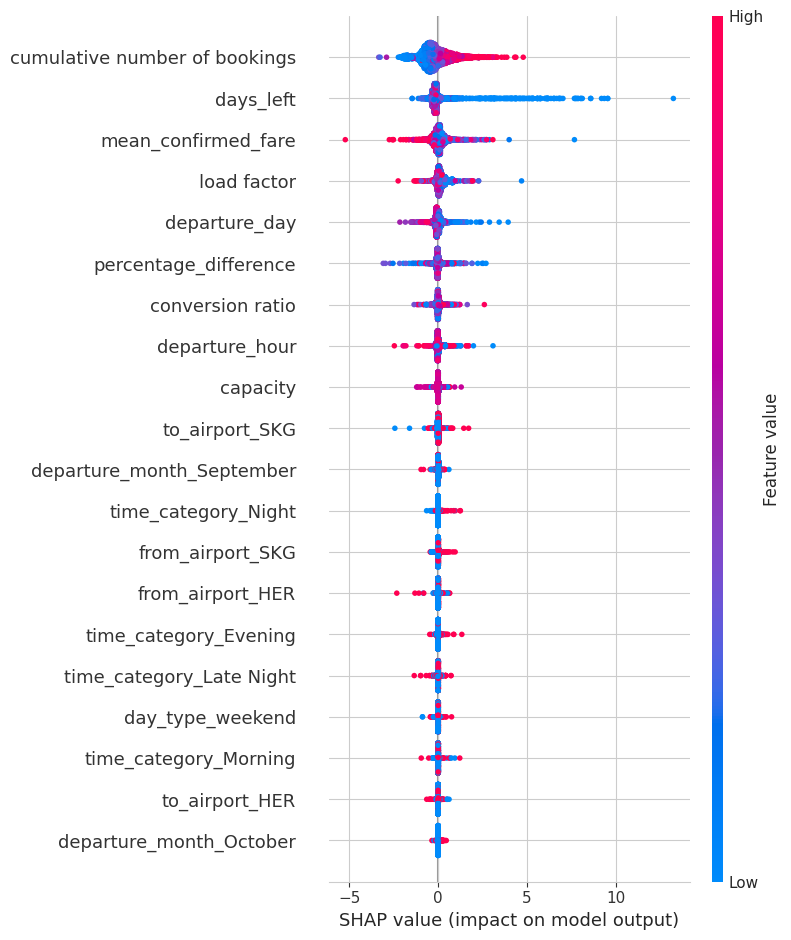

In [ ]:
#explainer = shap.TreeExplainer(model_mlp)

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)

explainer = shap.TreeExplainer(models['Decision Tree'])

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)




shap.initjs()
shap_values = explainer.shap_values(X_test_transformed_df)
shap.summary_plot(shap_values, X_test_transformed_df)


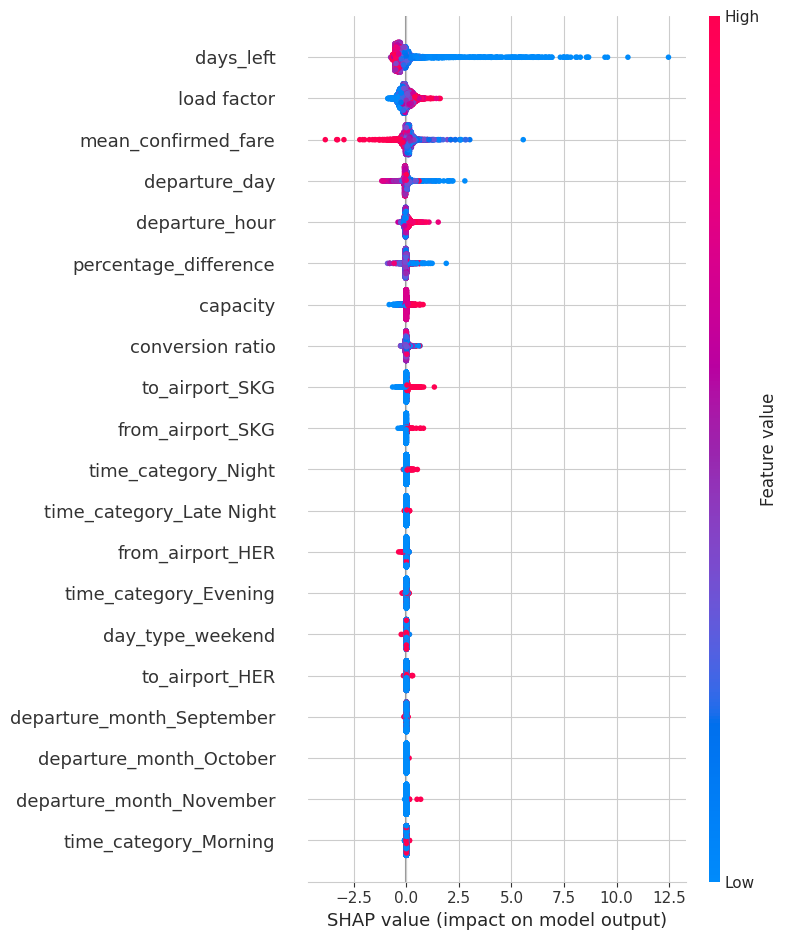

In [ ]:
#explainer = shap.TreeExplainer(model_mlp)

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# If you need it as a DataFrame (e.g., for easier viewing or manipulation), you can do:
columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)

explainer = shap.TreeExplainer(models['Random Forest'])

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

columns_after_transform = (numerical_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)))
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_after_transform, index=X_test.index)




# Load JS visualization code to notebook (for better plotting visuals)
shap.initjs()
shap_values = explainer.shap_values(X_test_transformed_df)
shap.summary_plot(shap_values, X_test_transformed_df)


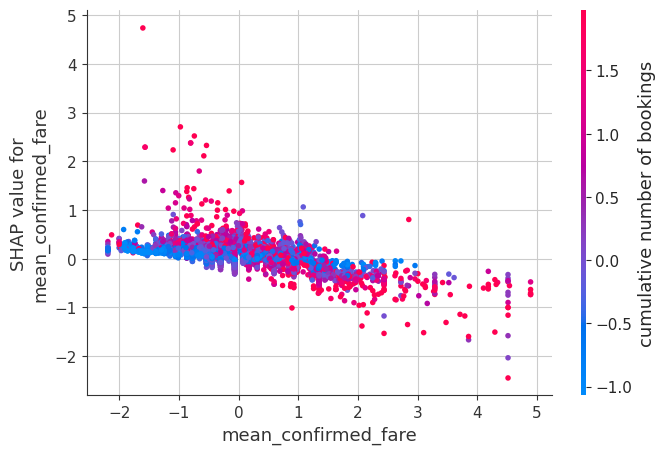

In [ ]:
shap.dependence_plot("mean_confirmed_fare", shap_values, X_test_transformed_df)
